In [186]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
import string


In [151]:
df = pd.read_csv(r"ner_dataset/data/ner_dataset.csv", encoding= 'unicode_escape')
df.loc[:,"Sentence #"] = df["Sentence #"].fillna(method="ffill")

/var/folders/x4/nry54yqs1hxd3d8m_cg20tcc0000gn/T/ipykernel_92075/813589456.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.loc[:,"Sentence #"] = df["Sentence #"].fillna(method="ffill")


In [158]:
df["Sentence #"].fillna(method="ffill")

/var/folders/x4/nry54yqs1hxd3d8m_cg20tcc0000gn/T/ipykernel_92075/3748213849.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Sentence #"].fillna(method="ffill")


0              Sentence: 1
1              Sentence: 1
2              Sentence: 1
3              Sentence: 1
4              Sentence: 1
                ...       
1048570    Sentence: 47959
1048571    Sentence: 47959
1048572    Sentence: 47959
1048573    Sentence: 47959
1048574    Sentence: 47959
Name: Sentence #, Length: 1048575, dtype: object

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Sentence #  1048575 non-null  object
 1   Word        1048565 non-null  object
 2   POS         1048575 non-null  object
 3   Tag         1048575 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


<BarContainer object of 17 artists>

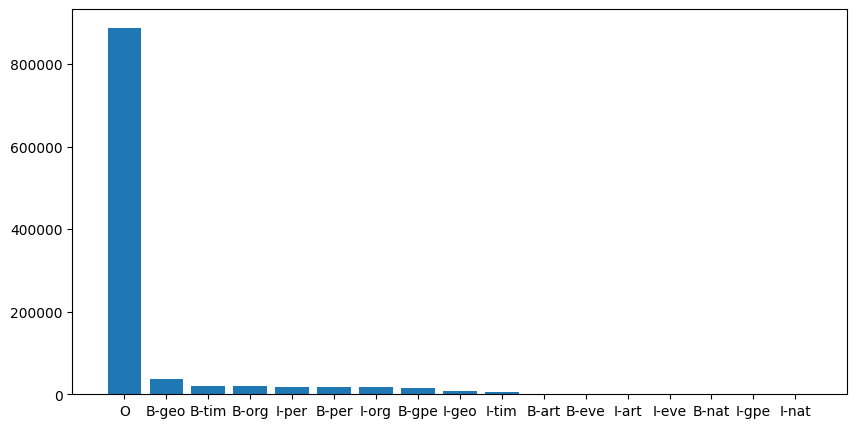

In [51]:
fig = plt.figure(figsize= (10,5))
plt.bar(df["Tag"].value_counts()[:].index, df["Tag"].value_counts().values[:])

<BarContainer object of 16 artists>

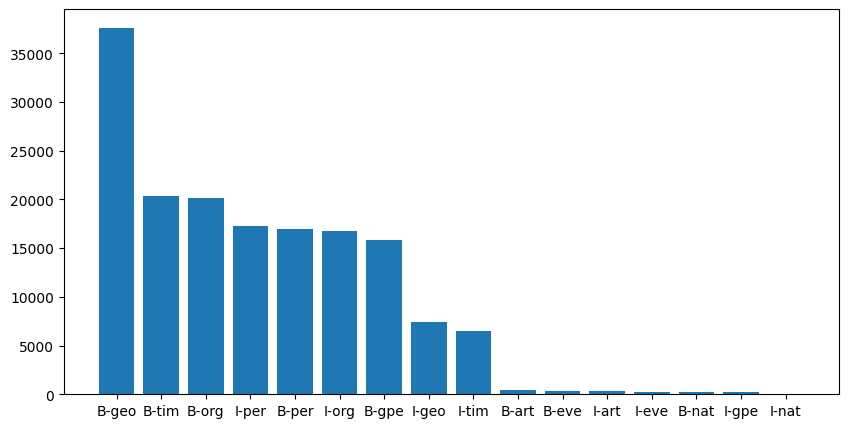

In [50]:
fig = plt.figure(figsize= (10,5))
plt.bar(df["Tag"].value_counts()[1:].index, df["Tag"].value_counts().values[1:])

removing NAN values as they were only 10 rows where the "Word" column was NAN

In [85]:
df = df[~df["Word"].isna()]

In [137]:
def get_features(word):
    vowels = "aeiouAEIOU"

    f1 = int(word.istitle())
    f2 = int(word.isalpha())
    f3 = int(word.isdigit())
    f4 = int(word.isupper())
    f5 = int(word.islower())
    f6 = sum(word.count(vowel) for vowel in vowels)
    f7 = len(word)
    return np.array([f1, f2, f3, f4, f5, f6, f7])



In [120]:
# df_= df[~df["Word"].str.isnumeric()].reset_index(drop= True)



In [138]:
df["vec"] = df["Word"].apply(lambda x :get_features(str(x)))

In [141]:
words = df["vec"].to_list()
tags = df["Tag"].values.tolist()



In [145]:
pred = cross_val_predict(RandomForestClassifier(n_estimators=20),X=words, y=tags, cv=5)

In [146]:
from sklearn.metrics import classification_report
report = classification_report(y_pred=pred, y_true=tags)
print(report)

/Users/shreyasm/learn/env/env_ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/shreyasm/learn/env/env_ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00       402
       B-eve       0.00      0.00      0.00       308
       B-geo       0.32      0.70      0.44     37644
       B-gpe       0.38      0.39      0.38     15870
       B-nat       0.00      0.00      0.00       201
       B-org       0.67      0.21      0.32     20143
       B-per       0.57      0.35      0.43     16990
       B-tim       0.30      0.49      0.37     20333
       I-art       0.00      0.00      0.00       297
       I-eve       0.00      0.00      0.00       253
       I-geo       0.00      0.00      0.00      7414
       I-gpe       0.00      0.00      0.00       198
       I-nat       0.00      0.00      0.00        51
       I-org       0.38      0.04      0.08     16784
       I-per       0.46      0.03      0.06     17251
       I-tim       0.50      0.06      0.11      6528
           O       0.97      0.98      0.97    887898

    accuracy              

/Users/shreyasm/learn/env/env_ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [179]:
df.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [199]:
df.groupby(by=["Sentence #"])["Word"].agg(list)

Sentence #
Sentence: 1        [Thousands, of, demonstrators, have, marched, ...
Sentence: 10       [Iranian, officials, say, they, expect, to, ge...
Sentence: 100      [Helicopter, gunships, Saturday, pounded, mili...
Sentence: 1000     [They, left, after, a, tense, hour-long, stand...
Sentence: 10000    [U.N., relief, coordinator, Jan, Egeland, said...
                                         ...                        
Sentence: 9995     [Opposition, leader, Mir, Hossein, Mousavi, ha...
Sentence: 9996     [On, Thursday, ,, Iranian, state, media, publi...
Sentence: 9997     [Following, Iran, 's, disputed, June, 12, elec...
Sentence: 9998     [Since, then, ,, authorities, have, held, publ...
Sentence: 9999     [The, United, Nations, is, praising, the, use,...
Name: Word, Length: 47959, dtype: object

In [203]:
df.groupby(by=["Sentence #"])["Tag"].agg(list)

Sentence #
Sentence: 1        [O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...
Sentence: 10       [B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,...
Sentence: 100      [O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O...
Sentence: 1000                     [O, O, O, O, O, O, O, O, O, O, O]
Sentence: 10000    [B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo...
                                         ...                        
Sentence: 9995     [O, O, O, B-per, I-per, O, O, O, O, O, O, O, O...
Sentence: 9996     [O, B-tim, O, B-gpe, O, O, O, O, O, O, O, O, B...
Sentence: 9997     [O, B-geo, O, O, B-tim, I-tim, O, O, O, O, O, ...
Sentence: 9998     [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...
Sentence: 9999     [O, B-org, I-org, O, O, O, O, O, O, O, O, O, O...
Name: Tag, Length: 47959, dtype: object